# Guided Capstone Step 6. Documentation

**The Data Science Method**  


1.   Problem Identification 

2.   Data Wrangling 
  
3.   Exploratory Data Analysis 
 
4.   Pre-processing and Training Data Development

5.  Modeling

6.   **Documentation**
  * Review the Results
  * Finalize Code 
  * Finalize Documentation
  * Create a Project Report 
  * Create a Slide Deck for the Executive Audience

In this guided capstone we are going to revisit many of the actions we took in the previous guided capstone steps. This gives you the opportunity to practice the code you wrote to solve the questions in step 4 and 5. 

**<font color='teal'> Start by loading the necessary packages and printing out our current working directory just to confirm we are in the correct project directory. </font>**

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score, mean_absolute_error
from sklearn import linear_model
from sklearn import preprocessing
%matplotlib inline

os.getcwd()

'D:\\Springboard\\Technical Project\\4_Guided Capstone Project\\6_Documentation'

## Fit Models with Training Dataset

**<font color='teal'> Using sklearn fit the model you chose in Guided Capstone 5 on your training dataset. This includes: creating dummy features for states if you need them, scaling the data,and creating train and test splits before fitting the chosen model.Also, remember to generate a model performance score(MAE, or explained variance) based on the testing hold-out data set.</font>**

#### Best Model 

In [3]:
df2 = pd.read_csv('D:\\Springboard\Technical Project\\4_Guided Capstone Project\\2_Data Wrangling\\data\\step3_output.csv', index_col=0)
df2.reset_index(inplace=True, drop=True)
pd.set_option('display.max_columns', None)

X2 = df2.drop(['Name','state', 'AdultWeekend'], axis=1)
y2 = df2.AdultWeekend 
scaler2 = preprocessing.StandardScaler().fit(X2)
X2_scaled=scaler2.transform(X2)
y2 = y2.ravel()
X2_train, X2_test, y2_train, y2_test = train_test_split(X2_scaled, y2, test_size=0.25, random_state=1)

lm2 = linear_model.LinearRegression()
model2 = lm2.fit(X2_train,y2_train)

y2_pred = lm2.predict(X2_test)

r2_2 = explained_variance_score(y2_test, y2_pred)
eabs_2 = mean_absolute_error(y2_test, y2_pred)

print("The R-square value for Linear Regression is: ", r2_2)
print("The mean absolute error for Linear Regression is: ", eabs_2)
print(pd.DataFrame((lm2.coef_), X2.columns, columns=['Coefficient']).sort_values('Coefficient', ascending=False))
print(y2_pred)

The R-square value for Linear Regression is:  0.7312443670662345
The mean absolute error for Linear Regression is:  6.44686769878445
                    Coefficient
AdultWeekday       1.074045e+01
clusters           3.382737e+00
daysOpenLastYear   3.338655e+00
Runs               1.895608e+00
quad               1.358054e+00
double             8.939274e-01
total_chairs       5.896647e-01
NightSkiing_ac     4.351204e-01
LongestRun_mi      3.915734e-01
vertical_drop      3.786582e-01
TerrainParks       3.070557e-01
triple             2.945626e-01
trams              2.664535e-15
fastEight         -4.440892e-16
fastSixes         -8.881784e-16
SkiableTerrain_ac -2.419213e-02
Snow Making_ac    -8.885219e-02
fastQuads         -2.139279e-01
yearsOpen         -3.646325e-01
surface           -6.498532e-01
averageSnowfall   -1.637446e+00
projectedDaysOpen -2.364513e+00
summit_elev       -2.829727e+00
[52.62940817 63.09379392 52.73766612 43.76662344 64.05743319 53.80329391
 63.39750635 41.34199672 6

## Review the results 

**<font color='teal'> Now, let's predict the Big Mountain Weekend price with our model in order to provide a recommendation to our managers on how to price the `AdultWeekend` lift ticket. First we need to find the row for Big Mountain resort in our data using string contains or string matching.</font>**

In [4]:
big_mount_res = df2[df2['Name'].str.contains('Big Mountain')]
print(big_mount_res)

Empty DataFrame
Columns: [Name, state, summit_elev, vertical_drop, trams, fastEight, fastSixes, fastQuads, quad, triple, double, surface, total_chairs, Runs, TerrainParks, LongestRun_mi, SkiableTerrain_ac, Snow Making_ac, daysOpenLastYear, yearsOpen, averageSnowfall, AdultWeekday, AdultWeekend, projectedDaysOpen, NightSkiing_ac, clusters]
Index: []


In [5]:
#There is no data of big mountain resort because during EDA while removing outliers data of Big Mountain has also been removed.
# Let's get the BigMountain data
df = pd.read_csv('D:\\Springboard\\Technical Project\\4_Guided Capstone Project\\2_Data Wrangling\\data\\step2_output.csv', index_col=0)
big_mount_res = df[df['Name'].str.contains('Big Mountain')]
big_mount_res['clusters'] = 3 # As per summit elevation and vertical drop the cluster is 3, hence we have assign it.
print(big_mount_res)

                    Name   Region    state  summit_elev  vertical_drop  \
151  Big Mountain Resort  Montana  Montana         6817           2353   

     base_elev  trams  fastEight  fastSixes  fastQuads  quad  triple  double  \
151       4464      0        0.0          0          3     2       6       0   

     surface  total_chairs   Runs  TerrainParks  LongestRun_mi  \
151        3            14  105.0           4.0            3.3   

     SkiableTerrain_ac  Snow Making_ac  daysOpenLastYear  yearsOpen  \
151             3000.0           600.0             123.0       72.0   

     averageSnowfall  AdultWeekday  AdultWeekend  projectedDaysOpen  \
151            333.0          81.0          81.0              123.0   

     NightSkiing_ac  clusters  
151           600.0         3  


C:\Users\prash\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


**<font color='teal'> Prepare the Big Mountain resort data row as you did in the model fitting stage.</font>**

In [6]:
X = big_mount_res.drop(['Name','state', 'Region', 'AdultWeekend', 'base_elev'], axis=1)
y = big_mount_res.AdultWeekend 
scaler = preprocessing.StandardScaler().fit(X)
X_scaled=scaler.transform(X)
y = y.ravel()

**<font color='teal'> Predict the Big Mountain resort `Adult Weekend` price and print it out.</font>** This is our expected price to present to management. Based on our model given the characteristics of the resort in comparison to other ski resorts and their unique characteristics.

In [7]:
y_pred = lm2.predict(X_scaled)
print("The expected price for the Adul Weekend ticket should be around: ", y_pred)

The expected price for the Adul Weekend ticket should be around:  [56.33096418]


**<font color='teal'> Print the Big Mountain resort actual `Adult Weekend` price.</font>**

In [8]:
print("The actual price for the Adul Weekend ticket is: ", y)

The actual price for the Adul Weekend ticket is:  [81.]


**<font color='teal'> As part of reviewing the results it is an important step to generate figures to visualize the data story. We can use the clusters we added to our data frame to create scatter plots for visualizing the Adult Weekend values compared to other characteristics. Run the example below to get you started and build two or three more figures to include in your data story telling.</font>**

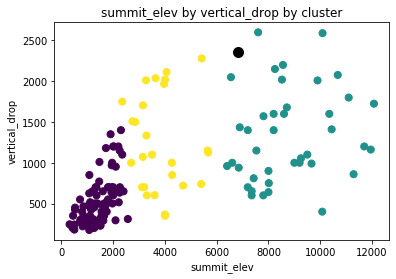

In [9]:
plt.scatter(df2['summit_elev'], df2['vertical_drop'], c=df2['clusters'], s=50, cmap='viridis', label ='clusters')
plt.scatter(big_mount_res['summit_elev'], big_mount_res['vertical_drop'], c='black', s=100)
plt.xlabel('summit_elev')
plt.ylabel('vertical_drop')
plt.title('summit_elev by vertical_drop by cluster')
plt.savefig('D:/Springboard/Technical Project/4_Guided Capstone Project/2_Data Wrangling/figures/fig1.png',bbox_inches='tight')

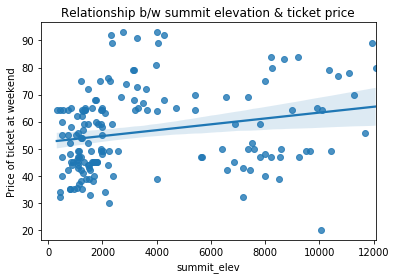

In [36]:
sns.regplot('summit_elev', 'AdultWeekend', data=df2)
plt.xlabel('summit_elev')
plt.ylabel('Price of ticket at weekend')
plt.title('Relationship b/w summit elevation & ticket price')
plt.show()

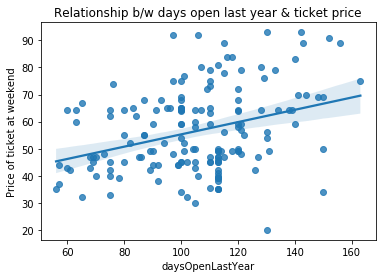

In [37]:
sns.regplot('daysOpenLastYear', 'AdultWeekend', data=df2)
plt.xlabel('daysOpenLastYear')
plt.ylabel('Price of ticket at weekend')
plt.title('Relationship b/w days open last year & ticket price')
plt.show()

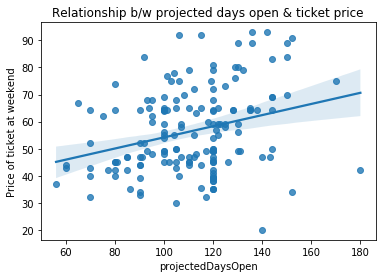

In [38]:
sns.regplot('projectedDaysOpen', 'AdultWeekend', data=df2)
plt.xlabel('projectedDaysOpen')
plt.ylabel('Price of ticket at weekend')
plt.title('Relationship b/w projected days open & ticket price')
plt.show()

## Finalize Code

 Making sure our code is well organized and easy to follow is an important step. This is the time where you need to review the notebooks and Python scripts you've created and clean them up so they are easy to follow and succinct in nature. Addtionally, we will also save our final model as a callable object using Pickle for future use in a data pipeline. Pickle is a module that serializes (and de-serializes) Python objects so that they can become executable objects like functions. It's used extensively in production environments where machine learning models are deployed on an industrial scale!**<font color='teal'> Run the example code below to save out your callable model. Notice that we save it in the models folder we created in our previous guided capstone step.</font>** 

In [10]:
import pickle
s = pickle.dumps(model2)
from joblib import dump, load
dump(model2, 'D:/Springboard/Technical Project/4_Guided Capstone Project/2_Data Wrangling\model/regression_model_adultweekend.joblib') 

['D:/Springboard/Technical Project/4_Guided Capstone Project/2_Data Wrangling\\model/regression_model_adultweekend.joblib']

## Finalize Documentation

For model documentation, we want to save the model performance metrics as well as the features included in the final model. You could also save the model perfomance metrics and coefficients fo the other models you tried in case you want to refer to them later. **<font color='teal'> Create a dataframe containing the coefficients and the model performance metrics and save it out as a csv file, then upload it to your github repository.</font>** 

In [30]:
model_desc = pd.DataFrame((lm2.coef_), X2.columns, columns=['Coefficient']).sort_values('Coefficient', ascending=False)
per_met = pd.DataFrame([eabs_2, r2_2], ['Mean Absolute Error', 'R-square value'], columns=['Coefficient'])
model_desc = pd.concat([model_desc, per_met], axis=0)
print(model_desc)

                      Coefficient
AdultWeekday         1.074045e+01
clusters             3.382737e+00
daysOpenLastYear     3.338655e+00
Runs                 1.895608e+00
quad                 1.358054e+00
double               8.939274e-01
total_chairs         5.896647e-01
NightSkiing_ac       4.351204e-01
LongestRun_mi        3.915734e-01
vertical_drop        3.786582e-01
TerrainParks         3.070557e-01
triple               2.945626e-01
trams                2.664535e-15
fastEight           -4.440892e-16
fastSixes           -8.881784e-16
SkiableTerrain_ac   -2.419213e-02
Snow Making_ac      -8.885219e-02
fastQuads           -2.139279e-01
yearsOpen           -3.646325e-01
surface             -6.498532e-01
averageSnowfall     -1.637446e+00
projectedDaysOpen   -2.364513e+00
summit_elev         -2.829727e+00
Mean Absolute Error  6.446868e+00
R-square value       7.312444e-01


In [32]:
model_desc.to_csv('D:\\Springboard\\Technical Project\\4_Guided Capstone Project\\2_Data Wrangling\\data\\model_description.csv')